<a href="https://colab.research.google.com/github/Chloe714/cs480student/blob/Assignment-4-Ekaterene/Copy_of_CS480_Assirgnment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

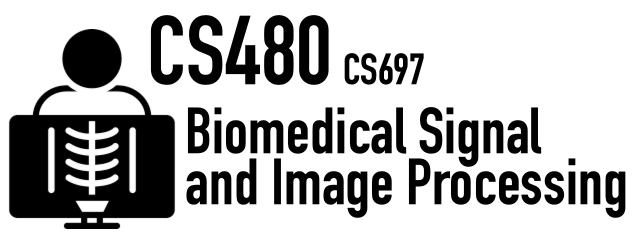
#Assignment 5

In [55]:
# In this assignment, we will visualize and explore a CT scan!

In [56]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [58]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [59]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [60]:
# TODO:There are 220 slices!

In [61]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [62]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

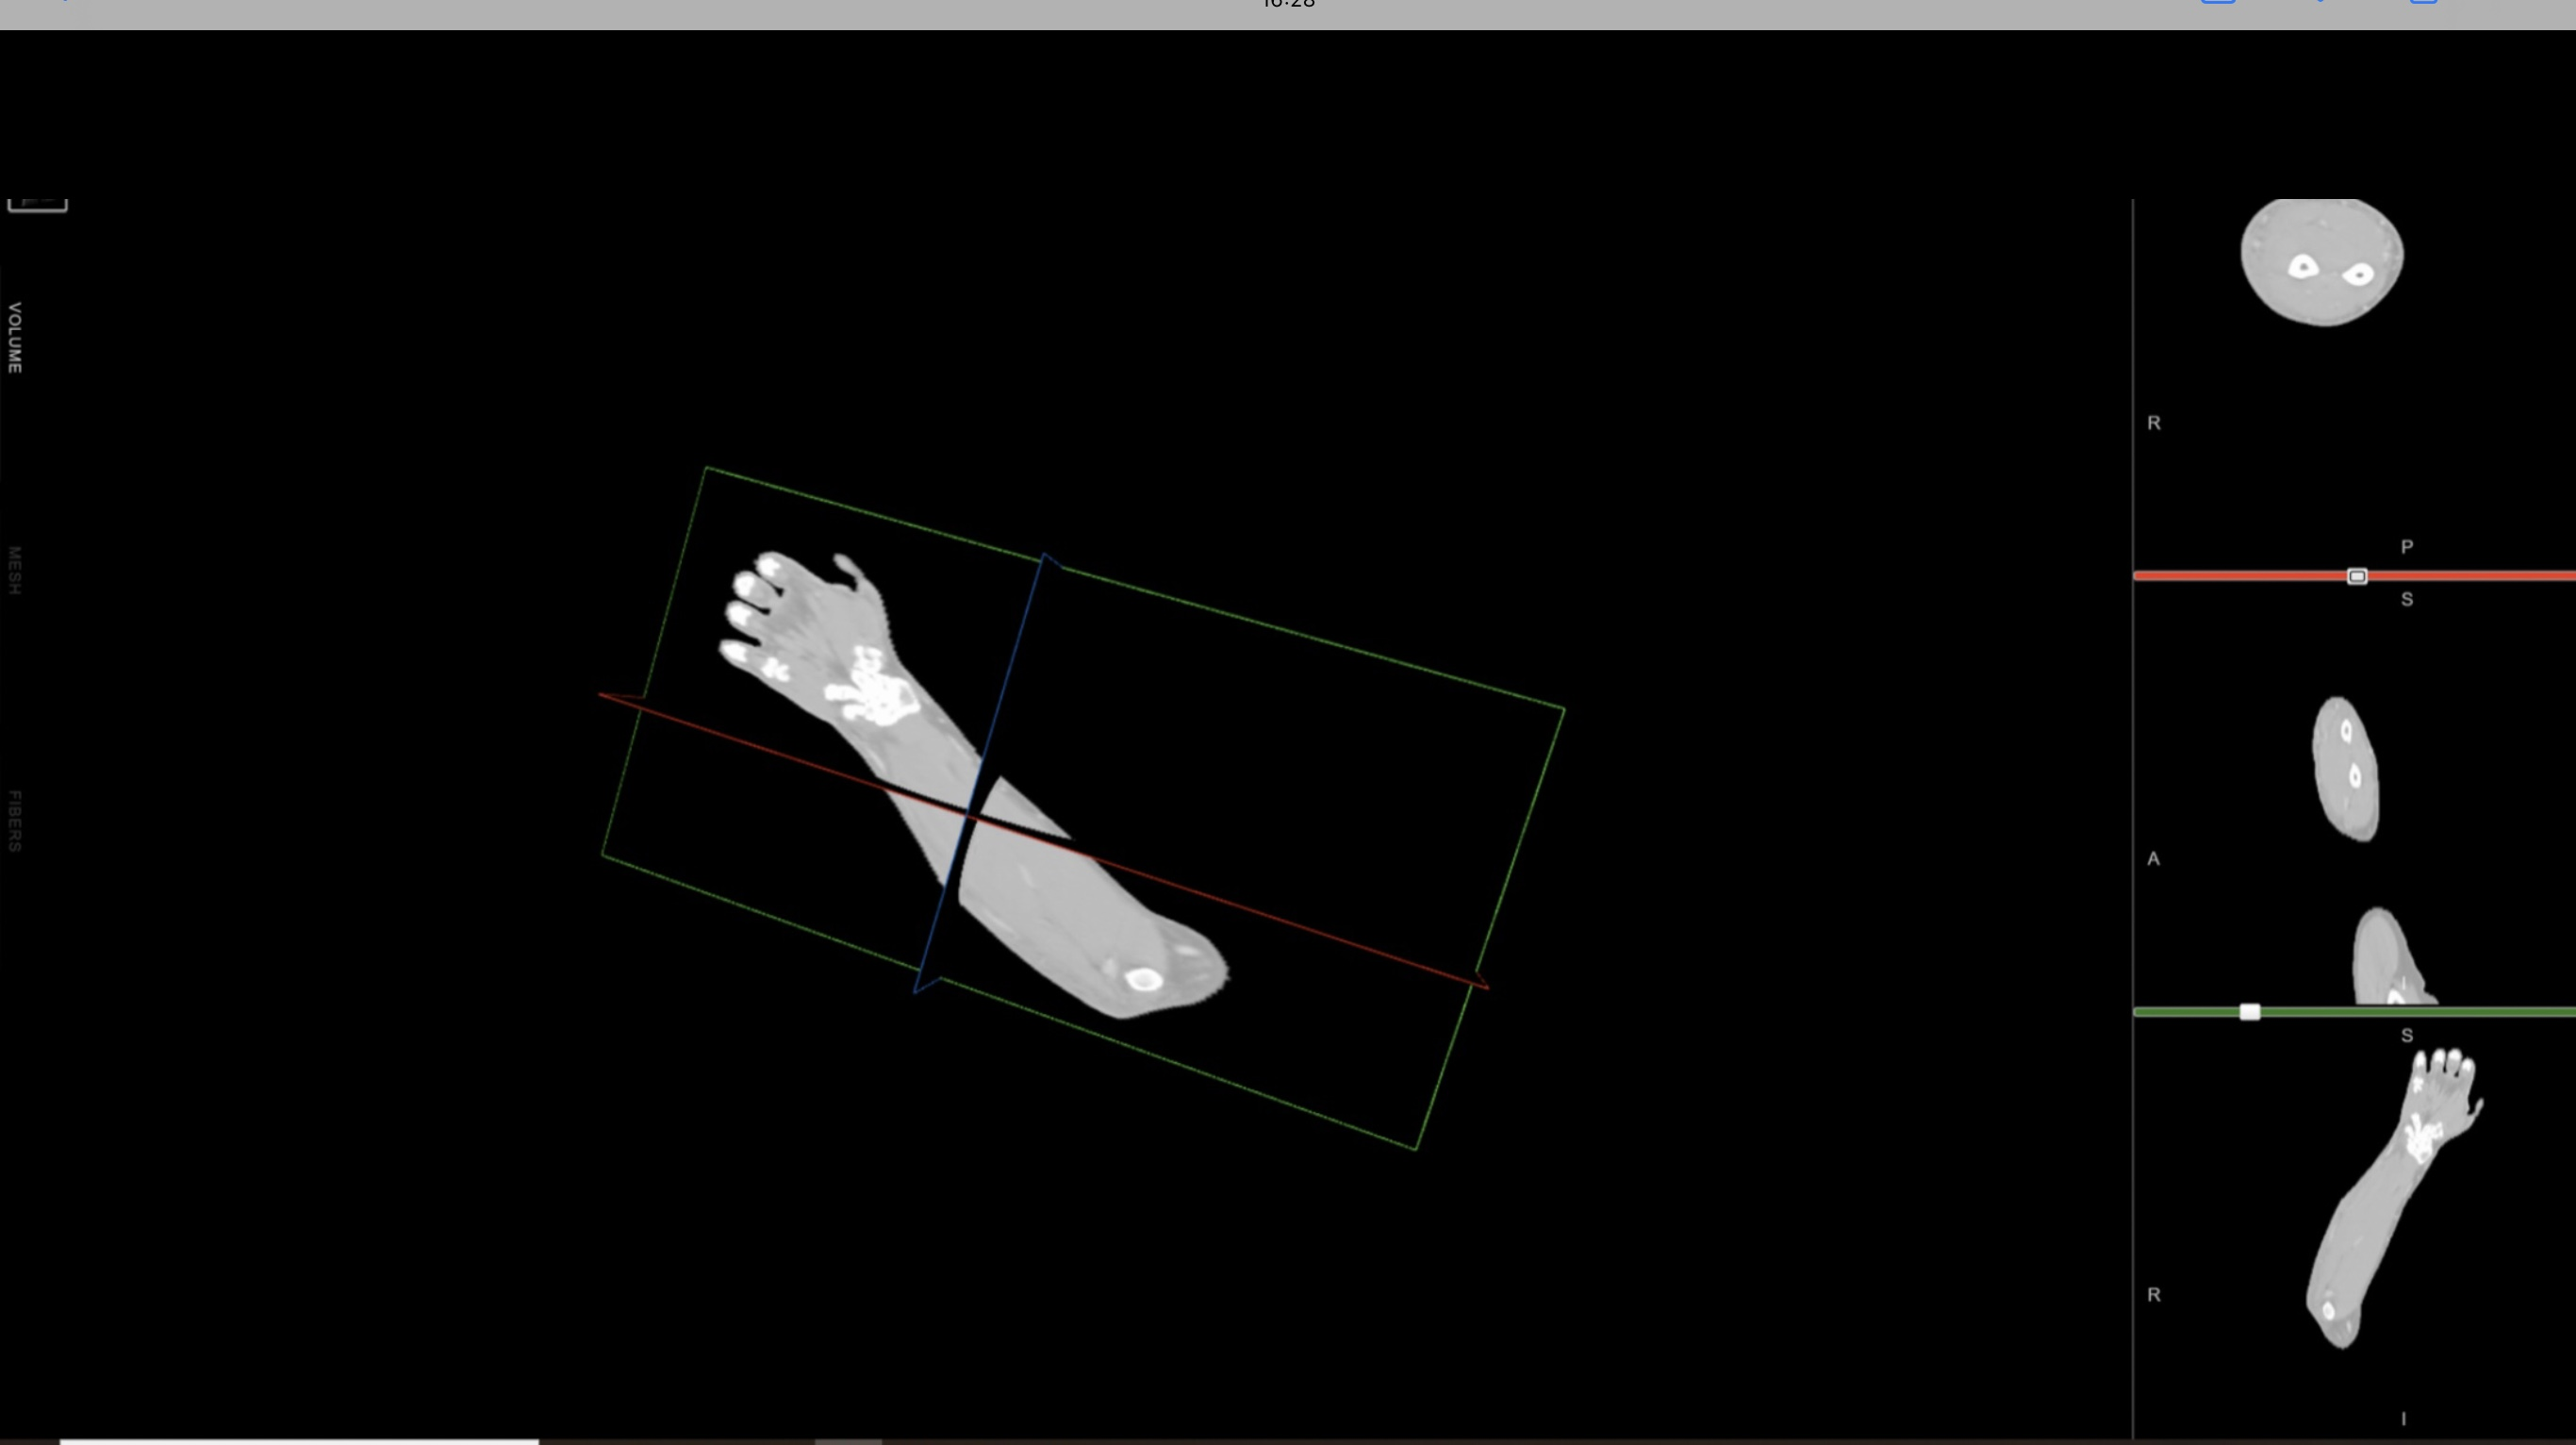

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [63]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [64]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [65]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [66]:
from pydicom import dcmread

In [67]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [76]:
# sort the list of filenames
import os
import numpy
CT_DIR ='ct/'
ct_files = os.listdir(CT_DIR)
filenames = (sorted(os.listdir("ct")))

# get shape
slice_0 = dcmread(CT_DIR +ct_files[0])
shape = list(slice_0.pixel_array.shape)
shape.append(len(ct_files))

# create a 3D array to store results
ct_slices = np.zeros(shape, dtype=np.float32)

# Store the colume as a 3d numpy array
for i in range(len(ct_files)):
  loaded_slice = dcmread(CT_DIR + ct_files[i])
  ct_slices[:, :, i] = loaded_slice.pixel_array

# loop through all the filenames
# read each file as a slice and append it to the list "slices"
# which stores a list of all the 2D slices
slices=[]
for i in range(len(filenames)):
  file=dcmread("ct/" + filenames[i])
  slices.append(file)

# get the dimensions of a single slice, returns a 2Dvalue called "shape"
# then append the length of the list itself to turn "shape" into 3 dimensions
# create the 3d volume bypassing "shape" into numpy.zeros

shape=list(slices[0].pixel_array.shape)
shape.append(len(slices))
volume=numpy.zeros(shape)

# loop through all the 2d slices
# and add the slices 1 by 1to the 3d colume

for i, slice in enumerate(slices):
  img=slice.pixel_array
  volume[:,:, i]=img

In [77]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [78]:
# TODO: YOUR CODE FOR AXIAL

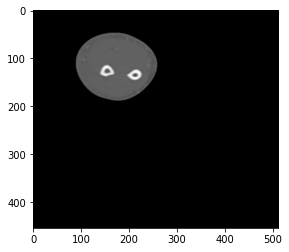

In [79]:
AXIAL = plt.imshow(volume[:, :, 100], cmap='gray')

In [80]:
# TODO: YOUR CODE FOR SAGITTAL

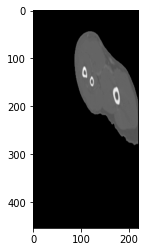

In [81]:
SAGITAL = plt.imshow(volume[:, 135, :], cmap='gray')

In [82]:
# TODO: YOUR CODE FOR CORONAL

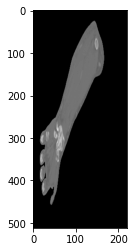

In [83]:
CORONAL = plt.imshow(volume[95, :, :], cmap="gray")

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [84]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [102]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [103]:
# TODO: YOUR CODE
slice=dcmread("ct/" + "IM-0001-0110.dcm")

# Window Center
print(slice[ 0x0028, 0x1050])

# Window Width
print(slice[ 0x0028, 0x1051])

# Rescale Intercept
print(slice[ 0x0028, 0x1052])

# Rescale Slope
print(slice[ 0x0028, 0x01053])

(0028, 1050) Window Center                       DS: "30.0"
(0028, 1051) Window Width                        DS: "410.0"
(0028, 1052) Rescale Intercept                   DS: "-1024.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


In [104]:
pixels=slice.pixel_array
hu_pixels=(pixels*1.0)

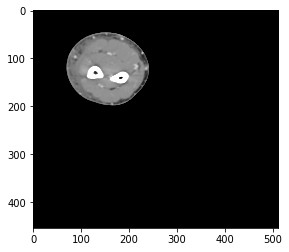

In [113]:
level=30
window=410
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [109]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

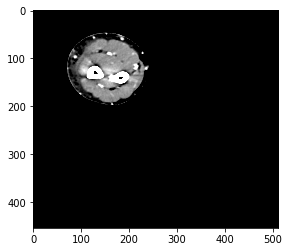

In [110]:
# TODO: YOUR CODE
level=50
window=100
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray' , vmin=vmin, vmax=vmax)

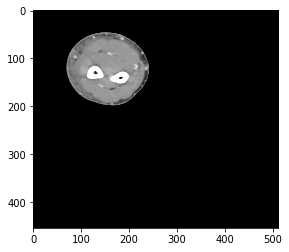

In [131]:
# TODO: YOUR CODE
level=20
window=400
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

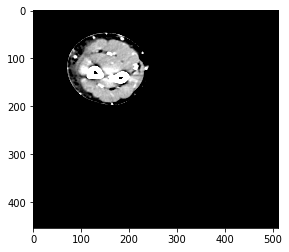

In [112]:
# TODO: YOUR CODE
level=40
window=80
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

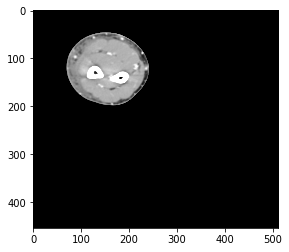

In [114]:
# TODO: YOUR CODE
level=0
window=300
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)

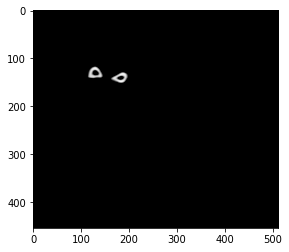

In [130]:
level=1000
window=1500
vmin=level - window/2
vmax=level + window/2
plt.imshow(hu_pixels-1024.0, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()       

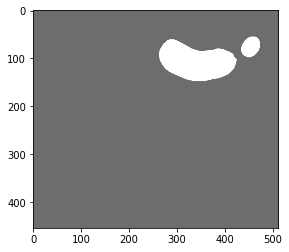

In [133]:
# TODO YOUR CODE
level = slice_0.WindowCenter
window = slice_0.WindowWidth
vmin = level - window/2
vmax = level + window/2
plt.imshow(slice_0.pixel_array, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

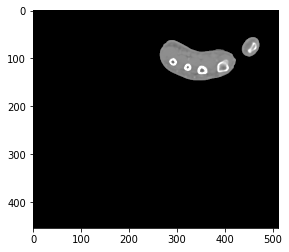

In [134]:
level = 1000
window = 1500
vmin = level - window/2
vmax = level + window/2
plt.imshow(slice_0.pixel_array, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [115]:
# Which values make sense and why?

In [121]:
# TODO: YOUR ANSWER
" Even though I tried different values, what make sense depends on what image we want to use, and what we are going to do to get the results. "


' Even though I tried different values, what make sense depends on what image we want to use, and what we are going to do to get the results. '

In [122]:
" the center window equals about 30 or the one with 1000 (that shows another image), which is the best use for bonesprobably, which makes a bit sense."

' the center window equals about 1000, which is the best use for bones, which makes sense.'

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

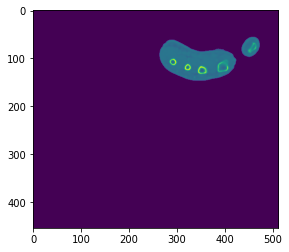

In [142]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask = slice_0.pixel_array.copy()
new_mask[new_mask < -100 ]= 0
plt.imshow(new_mask)

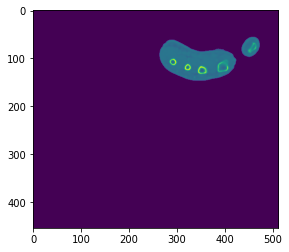

In [143]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask =slice_0.pixel_array.copy()
new_mask[new_mask < 50] = 0
plt.imshow(new_mask)

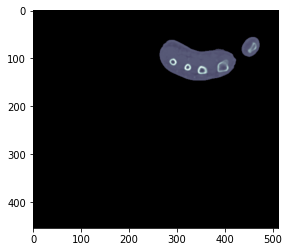

In [144]:
# TODO: YOUR CODE TO SEGMENT BONES
plt.imshow(new_mask, cmap=plt.cm.bone)

In [145]:
# Are the segmentations good?

In [146]:
# TODO: YOUR ANSWER

# I believe I could have done better I don't know if the coding is correct.

In [148]:
" I think they are good but not perfect even though it is showing me tha sagital image"

' I think they are good but not perfect even though it is showing me tha sagital image'

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""